#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [11]:
# Loading the dataset.

df = pd.read_csv('Advertising.csv')

df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [13]:
df.shape

(200, 5)

- This shows that the dataset have 200 rows and 5 columns including the target column.

- There are total 3 features (TV, radio, and newspaper) column and 1 target (sales) column.

- We're dropping 'Unnamed:0' column as it contains the serial number of the data which is of no use.

In [14]:
#Dropping the 'Unnamed: 0' column.

df = df.drop('Unnamed: 0',axis=1)

df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [15]:
#Checking for the columns:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

#### Column Description:

1. TV: shows the spendings on advertisements shown on the television.

2. Radio: spendings on advertisements on the radio.

3. Newspapers: spendings on advertisemnets in the newspapers.

4. sales: This is the target column. It shows the sales done due to the advertisements done on TV, radio, and newspapers.

#### Looking if there is any null values in the datset:

In [16]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

- This shows that there is no null values in the dataset.

#### Checking the informations of the datset:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


- There is no null values as said earlier.

- The datatype of all the columns is float.

#### Checking all variables at once:

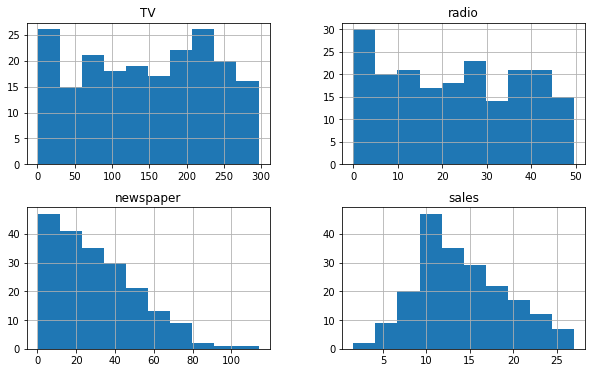

In [51]:
df.hist(bins=10, figsize=(10,6))

plt.show()

Spending is large for TV and minimum for newspaper.

#### Plotting pairplot

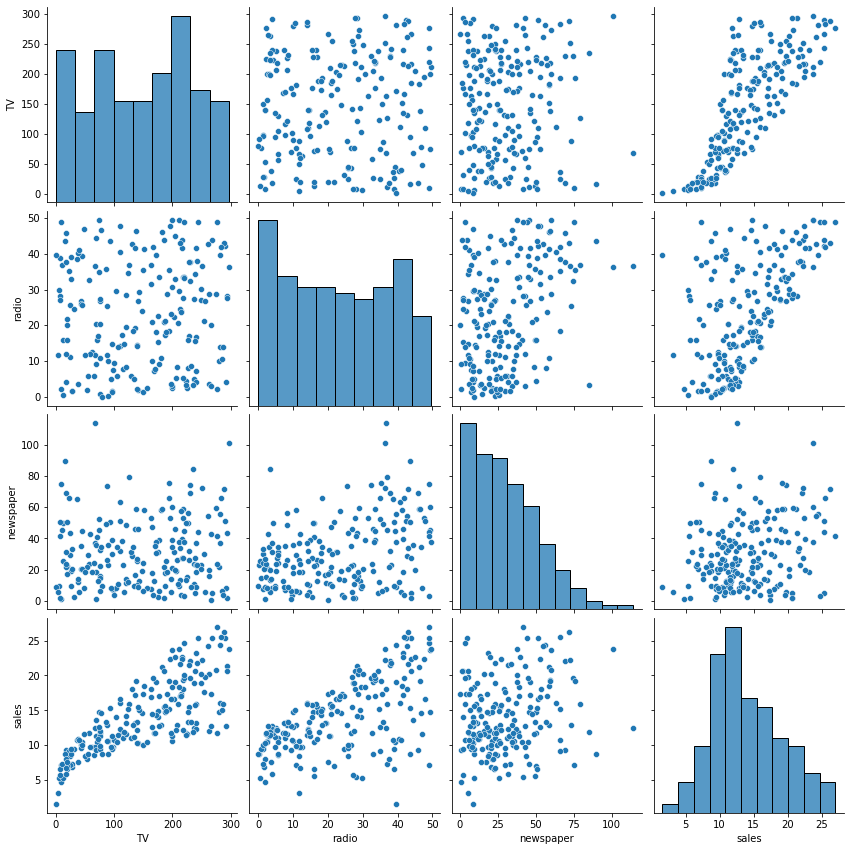

In [52]:
sns.pairplot(df, size=3.0)
plt.show()

- The target column is directly correlated with the TV.

- It is less correlated with the newspaper.

We'll check for the correlation later.

#### Checking for the description of the dataset:

In [18]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Heatmap for description:

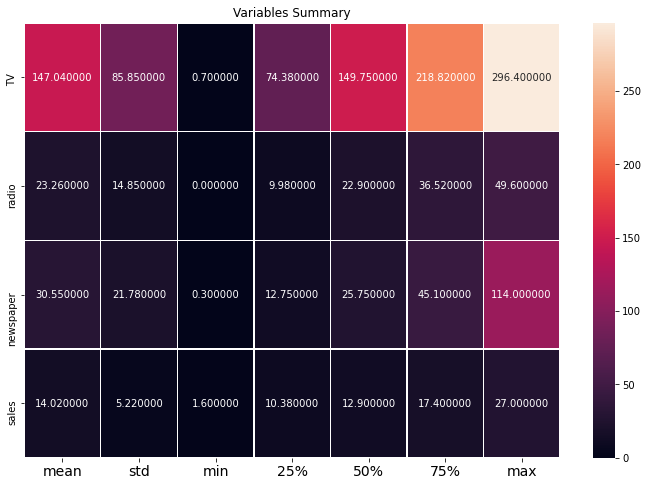

In [43]:
plt.figure(figsize=[12,8])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.title('Variables Summary')
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

- The maximum spending is on TV (average 147 dollars).
- The minimum spending is on radio (avaerage 23 dollars).

###### TV:
1. Mean: 147
2. Std: 85.85
3. min_value: 0.70
4. max_value: 296.40

###### Radio:
1. Mean: 23.26
2. Std: 14.85
3. min_value: 0.00
4. max_value: 49.60

###### Newspaper:
1. Mean: 30.55
2. Std: 21.78
3. min_value: 0.30
4. max_value: 114

#### Checking for Correlation:

In [44]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


#### Heatmap for correlation:

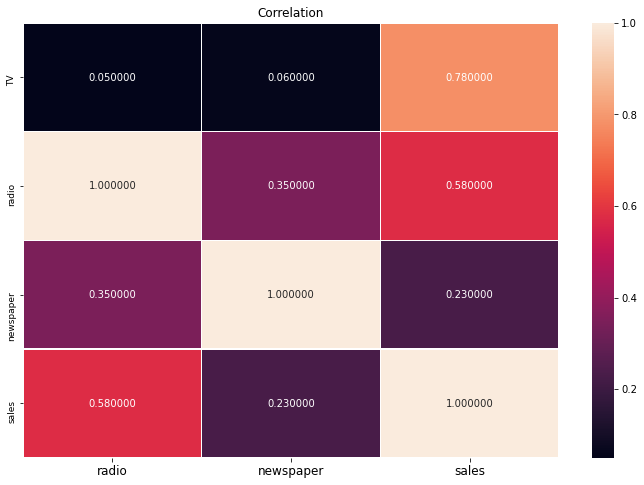

In [46]:
plt.figure(figsize=[12,8])
sns.heatmap(round(df.corr()[1:].transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.title('Correlation')
plt.xticks(fontsize=12)
plt.yticks(fontsize=9)
plt.show()

#### Outcome of correlation table:

- TV has 78% correlation with the target column (sales) which can be considered as very strong bond.

- Radio has 58% correlation with the target column (sales) which can be considered as very strong bond.

- Newspaper has 23% correlation with the target column (sales) which can be considered as strong bond.

- TV is showing maximum correlation with the target column and newsapaper is showing minimum correlation with the target column.

#### Outliers Analysis:

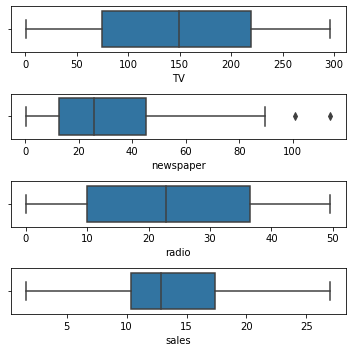

In [50]:
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt4 = sns.boxplot(df['sales'], ax = axs[3])
plt.tight_layout()

- From the boxplot we can say that there is no outliers in the TV and radio column.

- Very few outliers are present in the newspaper column.

- There is no outliers in the target column (sales).

#### Checking for Skewness:

In [53]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

There is no skewness in the TV, radio and target column.

Very less skewness is present in the newspaper column which can be neglected.

We're not removing outliers and skewness since it is very less and can be neglected.

#### Data Preprocessing:

In [58]:
# Splitting the independent and target variable in 'x' and 'y'

x = df.drop('sales', axis = 1)
y = df['sales']

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 42)

#### Model Training

In [65]:
# LinerRegression

from sklearn.linear_model import LinearRegression
LR = LinearRegression( fit_intercept = True)

LR.fit(x_train, y_train)
print(f"Linear coefficients : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Linear coefficients : [0.04472952 0.18919505 0.00276111]
Intercept : 2.979067338122629


In [66]:
y_pred = LR.predict(x_test)

In [67]:
# RMSE

from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squred Error is :', rmse)

Root Mean Squred Error is : 1.7815996615334502


In [68]:
# R-squred

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

#### Model Saving

In [70]:
import pickle
filename= 'advertisingsaleschannelprediction.pkl'
pickle.dump(LR, open(filename,'wb'))

#### Conclusion:

In [71]:
a = np.array(y_test)
predicted = np.array(LR.predict(x_test))
df_con = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_con

,Original,Predicted
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373
5,12.6,13.105592
6,22.3,21.057192
7,8.4,7.461010
8,11.5,13.606346
9,14.9,15.155070
